# Data Visualization 

## Weather Check

In [16]:
import numpy as np
import pandas as pd

import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected=True)

In [4]:
data = pd.read_csv("C:\\Users\\user\\Desktop\\Data.csv")
data.head(10)

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
5,3886937140,Yes,A specific website or app (please provide the ...,AccuWeather App,Somewhat likely,18 - 29,Male,"$100,000 to $124,999",West South Central
6,3886923931,Yes,The Weather Channel,-,Very unlikely,30 - 44,Male,"$25,000 to $49,999",West South Central
7,3886913587,Yes,-,-,-,-,-,-,-
8,3886889048,Yes,The Weather Channel,-,Very likely,30 - 44,Male,Prefer not to answer,Pacific
9,3886848806,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$150,000 to $174,999",West North Central


In [5]:
data.shape

(928, 9)

In [6]:
data.dtypes

RespondentID                                                                                                                                     int64
Do you typically check a daily weather report?                                                                                                  object
How do you typically check the weather?                                                                                                         object
A specific website or app (please provide the answer)                                                                                           object
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?    object
Age                                                                                                                                             object
What is your gender?                                                                          

In [7]:
attributes = ("Do you typically check a daily weather report?",
    "How do you typically check the weather?",
    "If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",
    "Age","What is your gender?",
     "How much total combined money did all members of your HOUSEHOLD earn last year?",
    "US Region")

for i in attributes:
    data[i] = data[i].astype("category")

In [8]:
type(data["Do you typically check a daily weather report?"])

pandas.core.series.Series

In [13]:
a= data["Do you typically check a daily weather report?"]
fig = px.pie(a,names=a, title="Do you typically check a daily weather report?",color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()
fig.write_html("D:\\Mini_Projects\\DataViz\\hw2gr1.html")

In [22]:
# If we use Plotly we can exclude 'missing values' directly from the chart
a= data["How do you typically check the weather?"]
fig = px.pie(a,names=a, title="How do you typically check the weather?",color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()
fig.write_html("D:\\Mini_Projects\\DataViz\\hw2gr2.html")

In [14]:
# In this particular dataset we won't lose any information if we drop rows with missing data

filtered= data[data["How do you typically check the weather?"]!="-"]
filtered.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


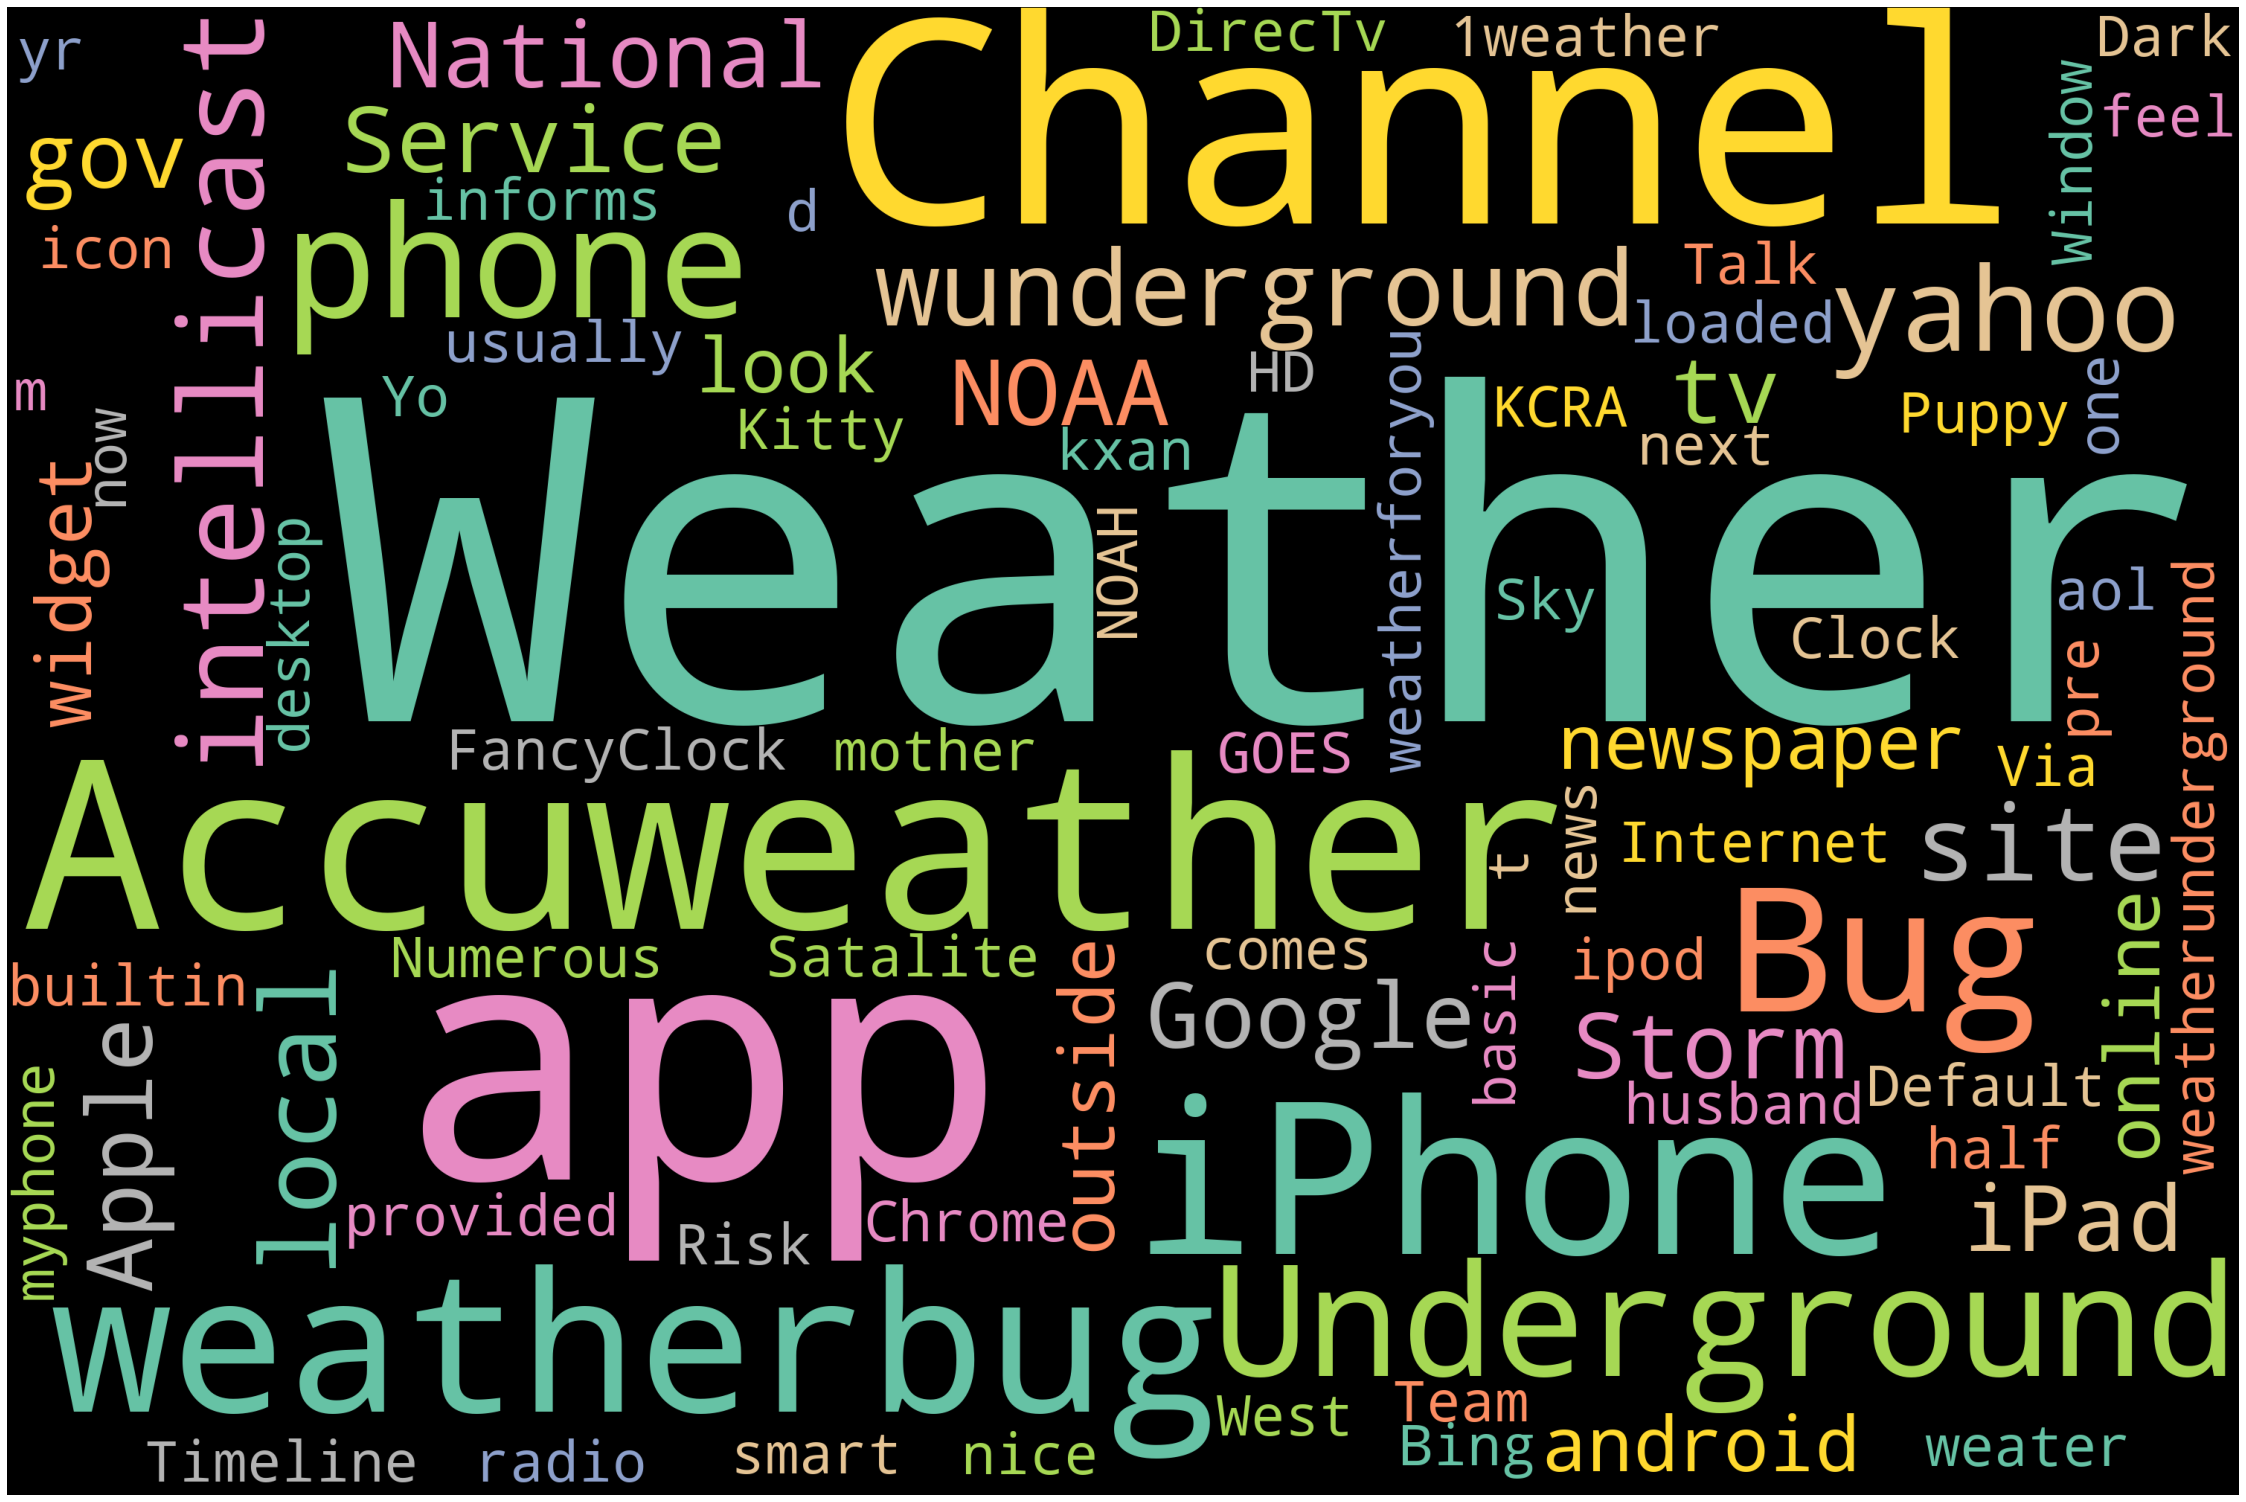

In [17]:
# Wordclouds don't show collocations but wordcloud might be helpful

web= filtered[filtered["A specific website or app (please provide the answer)"]!="-"]
webfilt = web["A specific website or app (please provide the answer)"]
webstr=webfilt.to_string()

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
    

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(webstr)

plot_cloud(wordcloud)

In [18]:
pivot = pd.read_csv("C:\\Users\\user\\Desktop\\pivot.csv")
pivot

,Unnamed: 0,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
0,18 - 29,61,11,68,36
1,30 - 44,68,14,71,51
2,45 - 59,73,20,128,57
3,60+,71,28,95,64


In [20]:
fig = go.Figure(data=go.Heatmap(
                   z=[[61,11,68,36], [68,14,71,51], [73,20,128,57], [71,28,95,64]],
                   x=['Somewhat likely', 'Somewhat unlikely', 'Very likely', 'Very unlikely'],
                   y=['18 - 29', '30 - 44', '45 - 59','60+'],
                   hoverongaps = False))
fig.show()
fig.write_html("D:\\Mini_Projects\\DataViz\\hw2gr3.html")

In [23]:
# ?

filtered1= filtered[filtered["US Region"]!="-"]

fig = px.bar_polar(filtered1, 
                   theta="US Region",r="How do you typically check the weather?",
                   color="How do you typically check the weather?",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                   title="How do people typically check the weather in different regions",width=1000, height=1000
                  )
fig.show()
fig.write_html("D:\\Mini_Projects\\DataViz\\hw2gr4.html")

In [24]:
fig = px.bar(filtered, x='Do you typically check a daily weather report?', color="What is your gender?", title="Do you typically check a daily weather report? BY GENDER",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
fig.write_html("D:\\Mini_Projects\\DataViz\\hw2gr5.html")